# Regresión logística


La regresión logística se utiliza para modelar la probabilidad de que ocurra un evento binario (resultado con dos posibles valores, como 0 o 1). La fórmula básica de la regresión logística es:

\[ P(Y=1) = \frac{1}{1 + e^{-(\beta_0 + \beta_1X_1 + \beta_2X_2 + \ldots + \beta_nX_n)}} \]

Donde:
- \( Y \): Variable dependiente binaria (0 o 1).
- \( X_i \): Variables independientes (predictoras).
- \( \beta_0 \): Intercepto.
- \( \beta_i \): Coeficientes de las variables independientes.
- \( e \): Base del logaritmo natural.

En regresión logística, queremos encontrar la mejor ecuación que describe la probabilidad de que \( Y \) sea 1 dado un conjunto de \( X \). El método de **máxima verosimilitud** se usa para estimar los coeficientes. Este método encuentra los valores de los coeficientes que maximizan la probabilidad de observar los datos dados los valores de \( X \).

Para que los resultados de la regresión logística sean válidos, se deben cumplir ciertas suposiciones:

- **Relación lineal en el logit**: La relación entre las variables independientes y el logit de la variable dependiente debe ser lineal.
- **Independencia de las observaciones**: Las observaciones deben ser independientes entre sí.
- **Ausencia de multicolinealidad**: Las variables independientes no deben estar altamente correlacionadas entre sí. Se puede detectar mediante el uso del Factor de Inflación de la Varianza (VIF).
- **Tamaño de muestra suficiente**: Debe haber suficientes eventos en ambas categorías de la variable dependiente.

La **multicolinealidad** ocurre cuando dos o más variables independientes están altamente correlacionadas entre sí. Esto puede dificultar la estimación precisa de los coeficientes. Se puede detectar mediante el uso del Factor de Inflación de la Varianza (VIF).

La regresión logística puede ser **peligrosa cuando se extrapolan predicciones fuera del rango de los datos observados**. La relación asumida puede no sostenerse fuera del rango de los datos originales.

La regresión logística es **sensible a los valores atípicos (outliers)**. Un solo valor atípico puede tener un gran impacto en los coeficientes estimados. Es importante detectar y tratar estos valores antes de ajustar el modelo.

### Métricas de Evaluación para la Regresión Logística

| Métrica             | Qué Mide                                                           | Interpretación                                   | Cuándo Usarla                                                     | Cuándo No Usarla                                          |
|---------------------|--------------------------------------------------------------------|--------------------------------------------------|-------------------------------------------------------------------|-----------------------------------------------------------|
| Accuracy            | Proporción de predicciones correctas                              | Valor entre 0 y 1, donde 1 es perfecto           | Evaluar el rendimiento general del modelo                          | Cuando las clases están desbalanceadas                    |
| Precision           | Proporción de verdaderos positivos entre los predichos como positivos | Valor entre 0 y 1, donde 1 es perfecto           | Evaluar el rendimiento en problemas donde el costo de falsos positivos es alto | Cuando necesitas evaluar la capacidad del modelo para detectar todos los positivos |
| Recall (Sensibilidad)| Proporción de verdaderos positivos entre todos los reales positivos| Valor entre 0 y 1, donde 1 es perfecto           | Evaluar el rendimiento en problemas donde el costo de falsos negativos es alto | Cuando necesitas evaluar la capacidad del modelo para evitar falsos positivos |
| F1 Score            | Media armónica de precision y recall                              | Valor entre 0 y 1, donde 1 es perfecto           | Evaluar el equilibrio entre precision y recall                    | Cuando las clases están desbalanceadas o se prefiere una métrica unidimensional |
| AUC-ROC             | Área bajo la curva ROC (Receiver Operating Characteristic)        | Valor entre 0 y 1, donde 1 es perfecto           | Evaluar la capacidad del modelo para distinguir entre clases      | Cuando necesitas una métrica interpretable de manera directa y unidimensional |
| Log-Loss            | Logaritmo de la función de pérdida                                | Valor más bajo es mejor                          | Evaluar la incertidumbre de las predicciones probabilísticas       | Cuando se prefieren métricas más interpretables como Accuracy |


-----------

## Ejemplo de ejercicio

### Primera exploración de los datos

In [1]:
import pandas as pd
df = pd.read_csv('./titanic.csv')

In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Más info de las columnas:

- SibSp: hermanos y matrimonios
- Parch: padres e hijos

In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

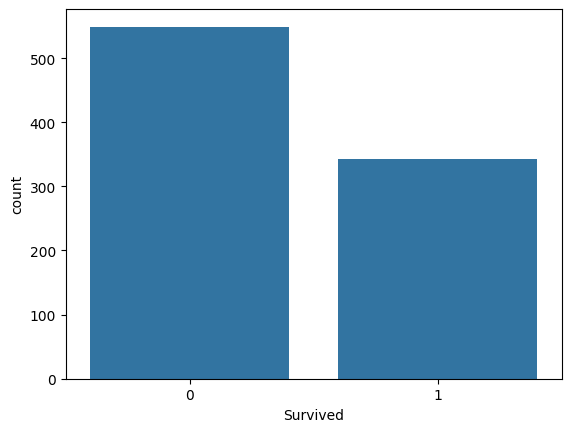

In [4]:
import seaborn as sb
sb.countplot (x = 'Survived', data= df)

<Axes: xlabel='Survived', ylabel='count'>

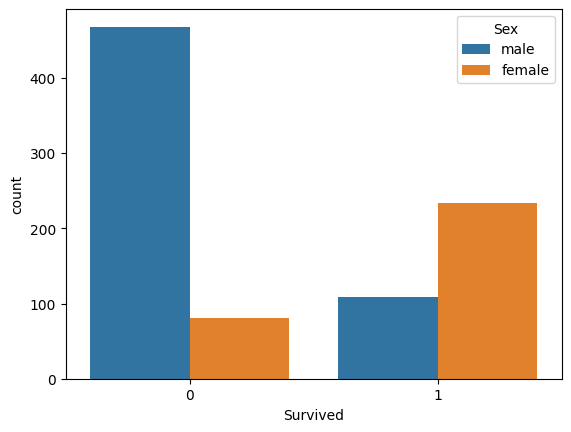

In [5]:
import seaborn as sb
sb.countplot (x = 'Survived', data= df, hue='Sex')

### Manejar los valores faltantes

In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Voy a rellenar los valores faltantes de Age con la media de los datos, la columna de Cabin la voy a eliminar porque no son datos relevantes y los 2 faltante de Embarked los voy a eliminar.

Comienzo por Age:

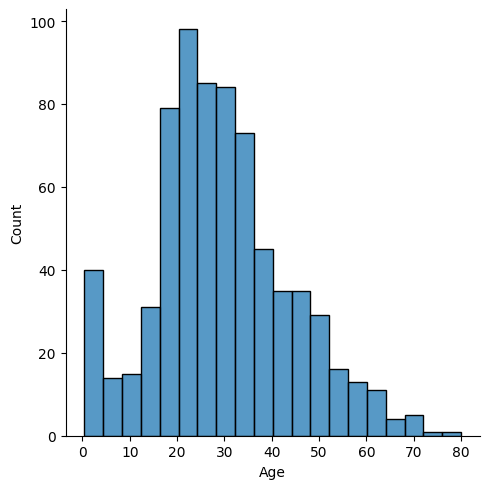

In [7]:
sb.displot(x='Age', data=df)

In [8]:
df['Age'].mean()

29.69911764705882

In [9]:
df['Age'].fillna(df['Age'].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [10]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [11]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Listo, ahora borro la columna de Cabin:

In [12]:
df = df.drop(['Cabin'], axis=1)

In [13]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

Listo, ahora borro los dos datos faltantes de Embarked:

In [14]:
df = df.dropna()

In [15]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Borrar columnas que no voy a necesitar

In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [17]:
df = df.drop(['Name', 'PassengerId', 'Ticket'], axis=1)

In [18]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Convertir Sex en numérica


In [19]:
dummies_sex = pd.get_dummies(df['Sex'], dtype= int, drop_first =True)
# drop_first =True se utiliza para evitar la redundancia y la multicolinealidad, porque si 1 es hombre, 0 es lo contrario a hombre, es decir, mujer. No hace falta tener 2 columnas.
dummies_sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


Lo agregamos al conjunto de datos:

In [20]:
df = df.join(dummies_sex)

Borro la columa de Sex que ya no me hace falta:

In [21]:
df = df.drop(['Sex'], axis = 1)

In [22]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,22.0,1,0,7.2500,S,1
1,1,1,38.0,1,0,71.2833,C,0
2,1,3,26.0,0,0,7.9250,S,0
3,1,1,35.0,1,0,53.1000,S,0
4,0,3,35.0,0,0,8.0500,S,1


## Vemos qué hacemos con la columna de Embarked

<Axes: xlabel='Survived', ylabel='count'>

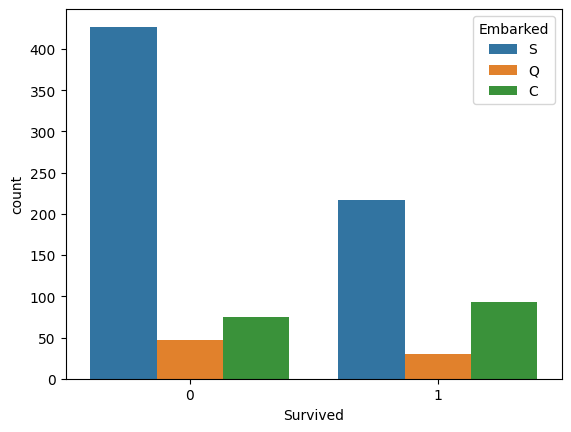

In [23]:
sb.countplot(x='Survived', data = df, hue ='Embarked')

In [24]:
dummies_embarked= pd.get_dummies(df['Embarked'], dtype= int, drop_first =True)

In [25]:
df = df.join(dummies_embarked)
df = df.drop(['Embarked'], axis = 1)

In [26]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


## Correlación entre las variables

<Axes: >

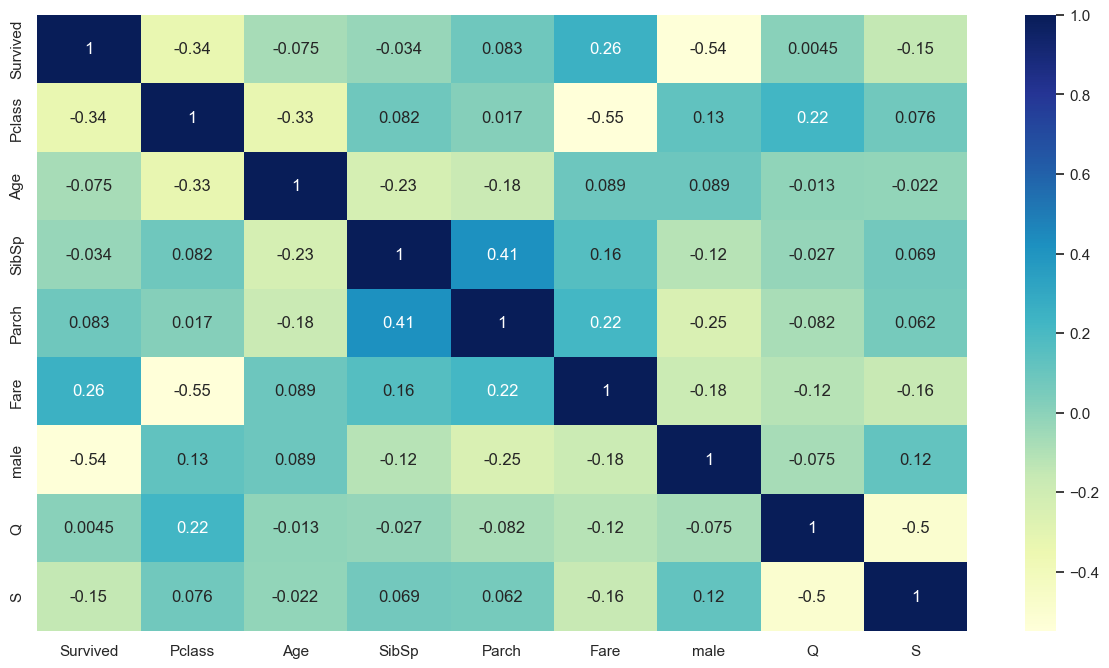

In [27]:
sb.set(rc={'figure.figsize': (15,8)})
sb.heatmap(df.corr(), annot=True, cmap = "YlGnBu")

<Axes: xlabel='Survived', ylabel='count'>

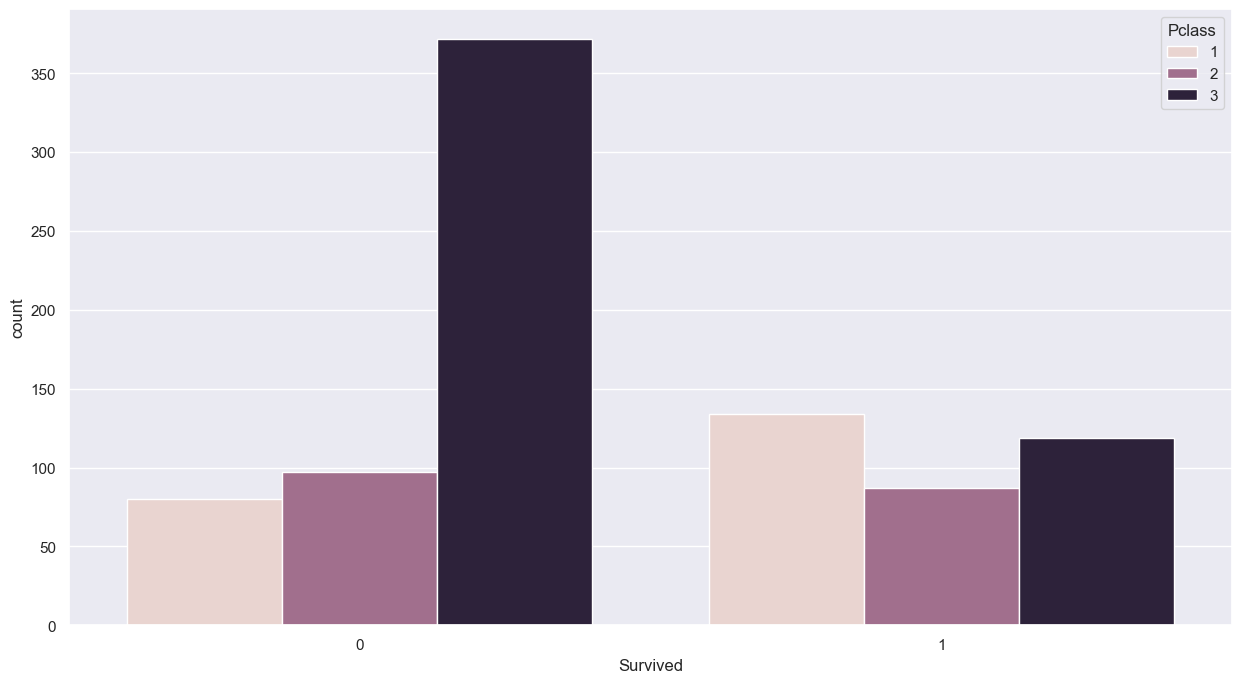

In [28]:
sb.countplot(x='Survived', data = df, hue='Pclass')

## Separación de X e y

In [29]:
X = df.drop(['Survived'], axis=1 )
y = df['Survived']

## Separar entre train y test

In [30]:
from sklearn.model_selection import train_test_split

X_ent, X_pru, y_ent, y_pru = train_test_split(X,y, test_size = .2)

In [31]:
X_ent.shape

(711, 8)

In [32]:
y_ent.shape

(711,)

## Entrenar el modelo

In [33]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression()

In [34]:
modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_ent, y_ent)

LogisticRegression(max_iter=1000)

## Hacer las predicciones y comprobar qué tan bien predice el modelo

In [35]:
predicciones = modelo.predict(X_pru)

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pru, predicciones)

0.7584269662921348

Como nuestros datos no están balanceados, es decir, no murieron el 50 % y sobrevivieron el 50 %, podemos hacer más cosas para tener una mayor información:

## Métricas para saber cómo de bien o mal predice el modelo

In [37]:
from sklearn.metrics import classification_report

print(classification_report(y_pru,predicciones))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       102
           1       0.75      0.66      0.70        76

    accuracy                           0.76       178
   macro avg       0.76      0.75      0.75       178
weighted avg       0.76      0.76      0.76       178



In [38]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_pru, predicciones)

array([[85, 17],
       [26, 50]])

In [39]:
pd.DataFrame(confusion_matrix(y_pru, predicciones), columns= ['Pred: No', 'Pred: Sí'], index=['Real: No', 'Real:Sí'])

,Pred: No,Pred: Sí
Real: No,85,17
Real:Sí,26,50


## Nuevo dato de persona que no conoce el modelo

In [40]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [42]:
import numpy as np
nueva_persona = np.array([[2, 35, 0, 0, 80, 0, 0, 0]])


In [43]:
prediccion = modelo.predict(nueva_persona)

/Users/lunaflorestorres/.pyenv/versions/3.11.6/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [44]:
if prediccion[0] == 1:
    print('Sobreviviste')
else:
    print('No sobreviviste')

Sobreviviste
